Combine the individual vendor QE and loss components, then create a combined 'minimum' detector response curve.

In [1]:
import os
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from math import factorial

In [2]:
detComponentDir = '../components/camera/detector/'
intermediateDir = '../intermediateFiles/components/camera/'
ven1QEFile = os.path.join(detComponentDir, 'vendor1/vendor1_QE.dat')
ven1LossesFile = os.path.join(detComponentDir, 'vendor1/vendor1_Losses/vendor1_losses.dat')
ven2QEFile = os.path.join(detComponentDir, 'vendor2/vendor2_QE.dat')
ven2LossesFile = os.path.join(detComponentDir, 'vendor2/vendor2_Losses/vendor2_losses.dat')
detectorFile = os.path.join(intermediateDir, 'detThroughput.dat')

In [3]:
ven1QE = np.loadtxt(ven1QEFile)
ven1Losses = np.loadtxt(ven1LossesFile)
ven2QE = np.loadtxt(ven2QEFile)
ven2Losses = np.loadtxt(ven2LossesFile)

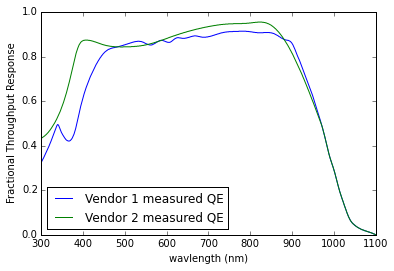

In [4]:
_ = plt.ylim([0., 1.002])
_ = plt.plot(ven1QE[:,0], ven1QE[:,1], label='Vendor 1 measured QE')
_ = plt.plot(ven2QE[:,0], ven2QE[:,1], label='Vendor 2 measured QE')
_ = plt.legend(loc='lower left')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [5]:
wavelen = np.arange(300, 1101, 1)
extrapolator = UnivariateSpline(ven1Losses[:,0], ven1Losses[:,1], k=1)
ven1DetLoss = extrapolator(wavelen)
extrapolator = UnivariateSpline(ven2Losses[:,0], ven2Losses[:,1], k=1)
ven2DetLoss = extrapolator(wavelen)

In [6]:
ven1DetQE = ven1QE[:,1] * ven1DetLoss
ven2DetQE = ven2QE[:,1] * ven2DetLoss

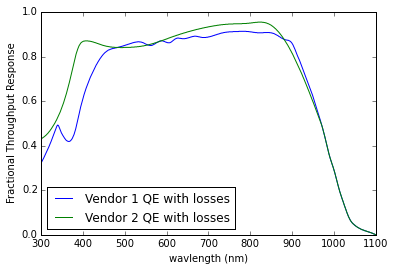

In [7]:
_ = plt.ylim([0., 1.002])
_ = plt.plot(wavelen, ven1DetQE, label='Vendor 1 QE with losses')
_ = plt.plot(wavelen, ven2DetQE, label='Vendor 2 QE with losses')
_ = plt.legend(loc='lower left')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [8]:
minDetQE = np.minimum(ven1DetQE, ven2DetQE)

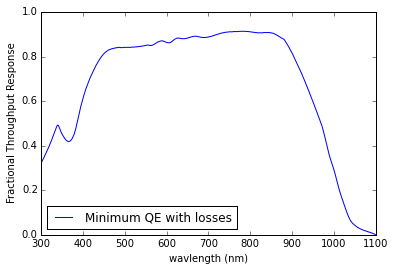

In [9]:
_ = plt.ylim([0., 1.002])
_ = plt.plot(wavelen, minDetQE, label='Minimum QE with losses')
_ = plt.legend(loc='lower left')
_ = plt.xlabel('wavlength (nm)')
_ = plt.ylabel('Fractional Throughput Response')

In [10]:
np.savetxt(detectorFile, zip(wavelen, minDetQE))